In [15]:
# Feel free to use this notebook for any data exploration you feel is useful

import interview_test_final
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from utils.conf import file_path
from utils.statistical_tests import one_sample_t_test, two_sample_t_test, two_sample_variance_test

# Exploratory Data Analysis

In [16]:
data = pd.read_csv(file_path, index_col = 0)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13599 entries, 1004889 to 1017676
Data columns (total 17 columns):
age                       13178 non-null float64
workclass                 13056 non-null object
salary                    13177 non-null float64
education_rank            13599 non-null int64
marital-status            13599 non-null object
occupation                13056 non-null object
race                      13599 non-null object
sex                       13599 non-null object
mins_beerdrinking_year    13175 non-null float64
mins_exercising_year      13178 non-null float64
works_hours               13599 non-null int64
tea_per_year              11170 non-null float64
coffee_per_year           11188 non-null float64
great_customer_class      13599 non-null int64
test                      13599 non-null int64
spent_17                  13599 non-null float64
spent_18                  13599 non-null float64
dtypes: float64(8), int64(4), object(5)
memory usage: 1.9+ MB


In [18]:
data.describe()

age         salary  education_rank  mins_beerdrinking_year  \
count  13178.000000   13177.000000    13599.000000            13175.000000   
mean      44.842009   37149.297355       10.675417              447.920607   
std       16.050574   24316.155119        2.224582             4782.134102   
min       14.000000    4872.750000        1.000000                0.000000   
25%       30.000000   20885.500000        9.000000                0.000000   
50%       50.000000   25912.750000       12.000000                0.000000   
75%       59.000000   48908.750000       12.000000                0.000000   
max       90.000000  363858.750000       16.000000            99999.000000   

       mins_exercising_year   works_hours  tea_per_year  coffee_per_year  \
count          13178.000000  13599.000000  11170.000000     11188.000000   
mean              46.034224     39.916317    217.276544       359.708169   
std              294.234126      9.839082    113.944411       164.680579   
min                0.000000      1.000000      1.000000         1.000000   
25%                0.000000     40.000000    175.000000       223.750000   
50%                0.000000     40.000000    175.000000       447.000000   
75%                0.000000     40.000000    276.000000       499.000000   
max             3900.000000     99.000000    499.000000       499.000000   

       great_customer_class          test      spent_17      spent_18  
count          13599.000000  13599.000000  13599.000000  13599.000000  
mean               0.085889      0.160747     57.586659     68.252595  
std                0.280210      0.367311     22.163776     22.149991  
min                0.000000      0.000000    -37.429405    -28.717547  
25%                0.000000      0.000000     43.188219     54.076651  
50%                0.000000      0.000000     57.586659     68.252595  
75%                0.000000      0.000000     71.659694     82.820437  
max                1.000000      1.000000    139.361785    152.124433

In [19]:
data.head(10)

age workclass    salary  education_rank marital-status  \
user_id                                                            
1004889  14.0   private  70773.00               9  Never-married   
1012811  25.0   private  76597.00               9       Divorced   
1006870  21.0   private  47947.25              10  Never-married   
1022149  23.0   private  41740.25               7       Divorced   
1029558  26.0   private       NaN               9        Married   
1022394  26.0   private  59060.50              15  Never-married   
1026358  58.0   private  56400.75               5       Divorced   
1026126  23.0   private  11329.25              10       Divorced   
1011738  14.0   private  21850.50              10  Never-married   
1024034  33.0   private  55331.00               9  Never-married   

           occupation           race     sex  mins_beerdrinking_year  \
user_id                                                                
1004889         sales  not_caucasian    Male                     0.0   
1012811         sales      caucasian  Female                     0.0   
1006870      clerical      caucasian  Female                     0.0   
1022149         sales      caucasian  Female                     0.0   
1029558         sales  not_caucasian    Male                     NaN   
1022394  professional      caucasian  Female                     0.0   
1026358          farm  not_caucasian    Male                     0.0   
1026126         sales      caucasian  Female                     0.0   
1011738         craft      caucasian    Male                     0.0   
1024034       factory  not_caucasian  Female                     0.0   

         mins_exercising_year  works_hours  tea_per_year  coffee_per_year  \
user_id                                                                     
1004889                   0.0           40         399.0              NaN   
1012811                   0.0           30         256.0              NaN   
1006870                   0.0           10         442.0            276.0   
1022149                   0.0           20           NaN              NaN   
1029558                   0.0           36           NaN            120.0   
1022394                   0.0           30         177.0            377.0   
1026358                   0.0           40          11.0             98.0   
1026126                   0.0           40          29.0            276.0   
1011738                   0.0           40         375.0              NaN   
1024034                   0.0           40         375.0             77.0   

         great_customer_class  test   spent_17   spent_18  
user_id                                                    
1004889                     0     0  18.297024  41.664116  
1012811                     0     1  61.527839  79.876744  
1006870                     0     0  29.813543  36.155701  
1022149                     0     0  69.938808  72.754263  
1029558                     0     1  57.586659  68.252595  
1022394                     0     1  74.030477  81.740678  
1026358                     0     0  83.338088  80.094982  
1026126                     0     0  43.180389  52.342830  
1011738                     0     0  38.783547  32.760936  
1024034                     0     1  45.345253  64.931443

In [36]:
# Change of Spend
data['change_of_spend'] = data['spent_18'] - data['spent_17']
# Divide the data
test_group_data = data.loc[data['test'] == 1,:]
control_group_data = data.loc[data['test'] == 0,:]

(array([  64.,   66.,   58.,   65.,   57.,   67.,   68.,   82.,   65.,
          72.,   60.,   42.,   66.,   75.,   63.,   62.,   68.,   63.,
          75.,   75.,   56.,   61.,   60.,   74.,   63.,   76.,   75.,
          72.,   63.,   70.,   64.,   63.,   74.,   65.,   58.,   54.,
          64.,   54.,   60.,   68.,   52.,   67.,   70.,   49.,   66.,
          72.,   47.,   56.,   72.,   66.,   58.,   59.,   66.,   73.,
          64.,   62.,   63.,   58.,   51.,   68.,   70.,   59.,   71.,
          63.,   62.,   57.,   65.,   60.,   63.,   61.,   59.,   61.,
          78.,   64.,   65.,   61.,   70.,   65.,   62.,   65.,   71.,
          69.,   57.,   59.,   74.,   64.,   58.,   62.,   64.,   66.,
          68.,   58.,   72.,   67.,   60.,   68.,   54.,   56., 5073.,
          66.]),
 array([1000006.  , 1000494.33, 1000982.66, 1001470.99, 1001959.32,
        1002447.65, 1002935.98, 1003424.31, 1003912.64, 1004400.97,
        1004889.3 , 1005377.63, 1005865.96, 1006354.29, 1006842.62

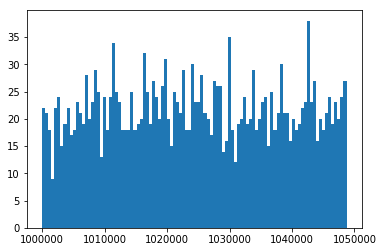

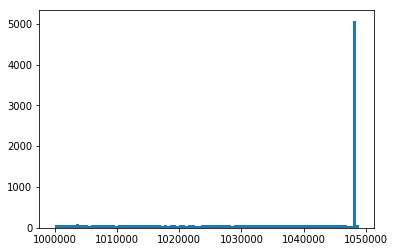

In [21]:
plt.figure()
plt.hist(test_group_data.index.values, bins = 100)
plt.figure()
plt.hist(control_group_data.index.values, bins = 100)
# why are there so many subjects in the control group who belong to the last part of the identifier?

In [25]:
# identifier 1048161
check = control_group_data.loc[1048161]
check.tail()
# this subjects have same values for all the attributes but different spend in 2017 and 2018, how so?


age      workclass   salary  education_rank marital-status  \
user_id                                                                
1048161  59.0  self_employed  20885.5              12       Divorced   
1048161  59.0  self_employed  20885.5              12       Divorced   
1048161  59.0  self_employed  20885.5              12       Divorced   
1048161  59.0  self_employed  20885.5              12       Divorced   
1048161  59.0  self_employed  20885.5              12       Divorced   

        occupation       race   sex  mins_beerdrinking_year  \
user_id                                                       
1048161       tech  caucasian  Male                     0.0   
1048161       tech  caucasian  Male                     0.0   
1048161       tech  caucasian  Male                     0.0   
1048161       tech  caucasian  Male                     0.0   
1048161       tech  caucasian  Male                     0.0   

         mins_exercising_year  works_hours  tea_per_year  coffee_per_year  \
user_id                                                                     
1048161                   0.0           40         175.0            499.0   
1048161                   0.0           40         175.0            499.0   
1048161                   0.0           40         175.0            499.0   
1048161                   0.0           40         175.0            499.0   
1048161                   0.0           40         175.0            499.0   

         great_customer_class  test   spent_17   spent_18  
user_id                                                    
1048161                     0     0  50.814477  43.971728  
1048161                     0     0  83.518010  86.809723  
1048161                     0     0  51.776356  78.009551  
1048161                     0     0  72.684114  82.277937  
1048161                     0     0  42.250556  53.531958

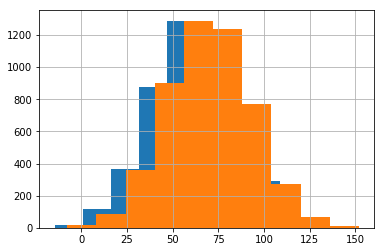

In [26]:
check['spent_17'].hist()
check['spent_18'].hist()

In [27]:
data = data.drop_duplicates()
# it does not really drop the duplicates of 1048161, because they have different spend
data = data.drop(index = 1048161)


In [39]:
data['mins_exercising_year'].value_counts()

0.0       7849
1902.0      43
1887.0      30
1977.0      22
1590.0      14
1876.0      13
1485.0      13
1740.0      11
1980.0      11
1974.0       9
1602.0       9
1579.0       8
1408.0       8
2339.0       7
1504.0       7
1672.0       7
1669.0       6
1741.0       6
1719.0       6
1848.0       6
2051.0       6
2258.0       4
1721.0       4
625.0        4
2415.0       4
1668.0       3
2179.0       3
2001.0       3
2002.0       3
1762.0       3
          ... 
2444.0       2
1617.0       2
2042.0       2
2163.0       2
2057.0       2
3770.0       2
1816.0       2
2205.0       2
2246.0       2
2559.0       2
1651.0       2
1735.0       2
1340.0       1
2231.0       1
419.0        1
3900.0       1
1726.0       1
2824.0       1
2129.0       1
3004.0       1
1844.0       1
2201.0       1
1092.0       1
323.0        1
1944.0       1
1138.0       1
2282.0       1
2467.0       1
1573.0       1
2352.0       1
Name: mins_exercising_year, Length: 65, dtype: int64

In [29]:
# missing values
num_obs = data.shape[0]
for column in data:
    missing_ratio = sum(data[column].isna())/num_obs
    print('Percentage of missing values in column {} is {} '.format(column, missing_ratio))

Percentage of missing values in column age is 0.04896487555245406 
Percentage of missing values in column workclass is 0.06315422191207258 
Percentage of missing values in column salary is 0.04908118167015585 
Percentage of missing values in column education_rank is 0.0 
Percentage of missing values in column marital-status is 0.0 
Percentage of missing values in column occupation is 0.06315422191207258 
Percentage of missing values in column race is 0.0 
Percentage of missing values in column sex is 0.0 
Percentage of missing values in column mins_beerdrinking_year is 0.049313793905559435 
Percentage of missing values in column mins_exercising_year is 0.04896487555245406 
Percentage of missing values in column works_hours is 0.0 
Percentage of missing values in column tea_per_year is 0.28250755989765064 
Percentage of missing values in column coffee_per_year is 0.2804140497790184 
Percentage of missing values in column great_customer_class is 0.0 
Percentage of missing values in colum

c:\users\ying-fang.kao\appdata\local\conda\conda\envs\myenv\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\ying-fang.kao\appdata\local\conda\conda\envs\myenv\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


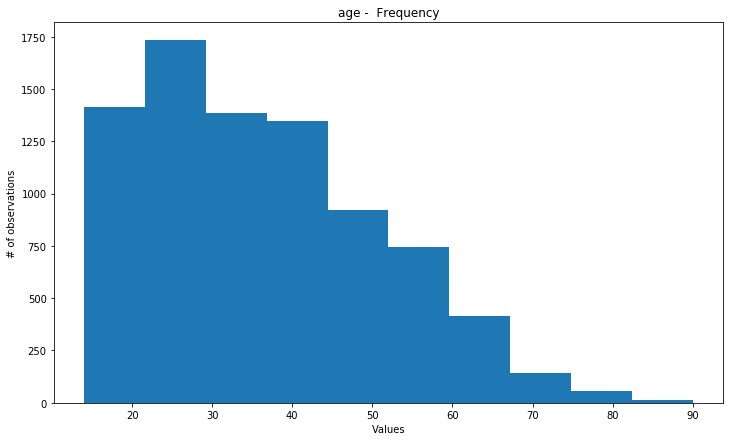

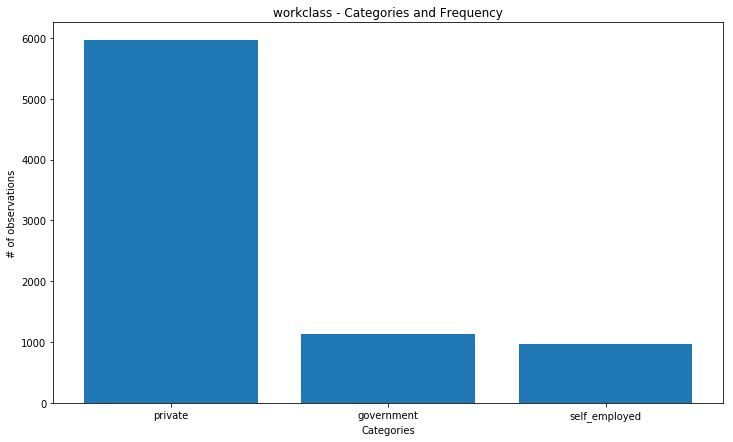

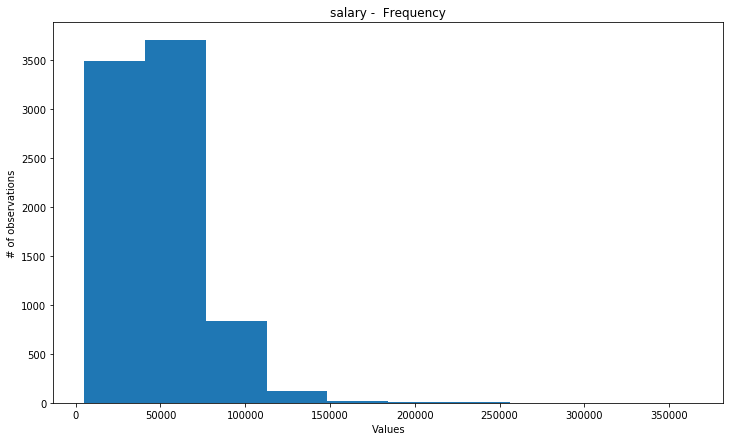

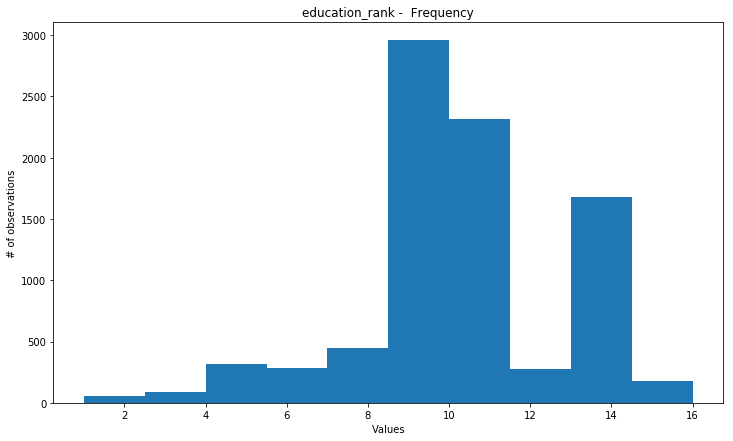

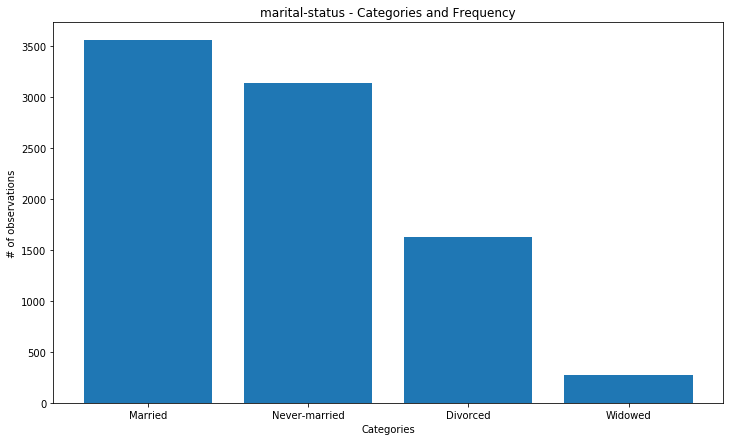

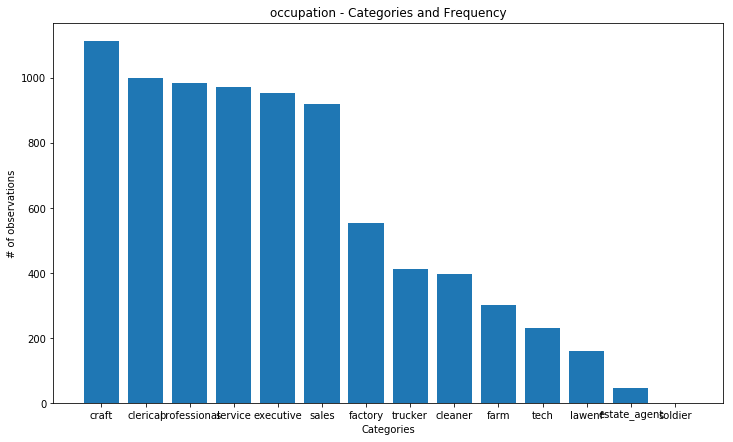

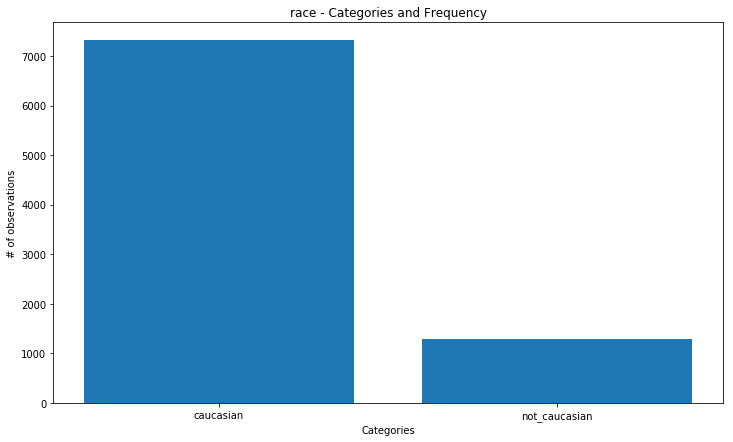

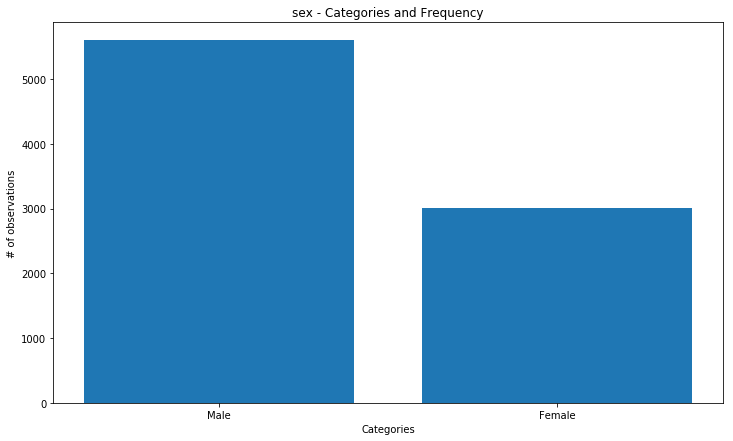

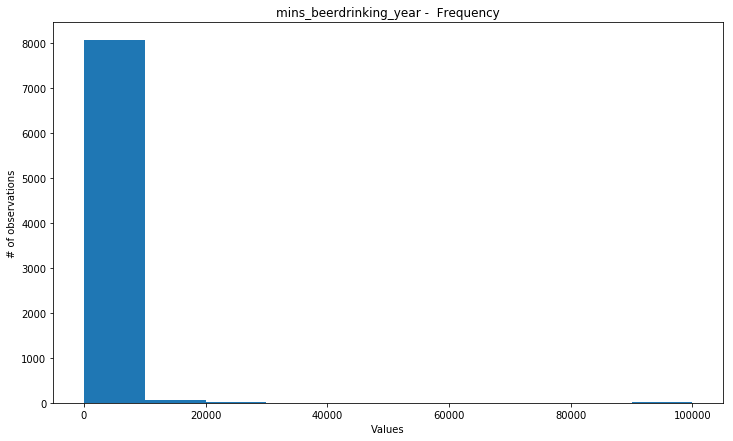

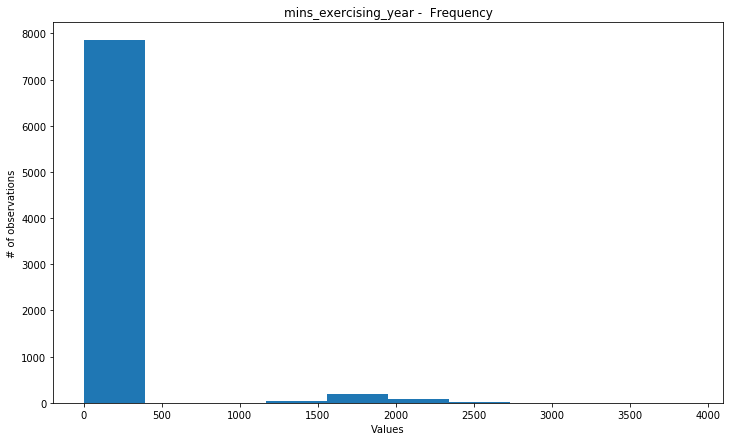

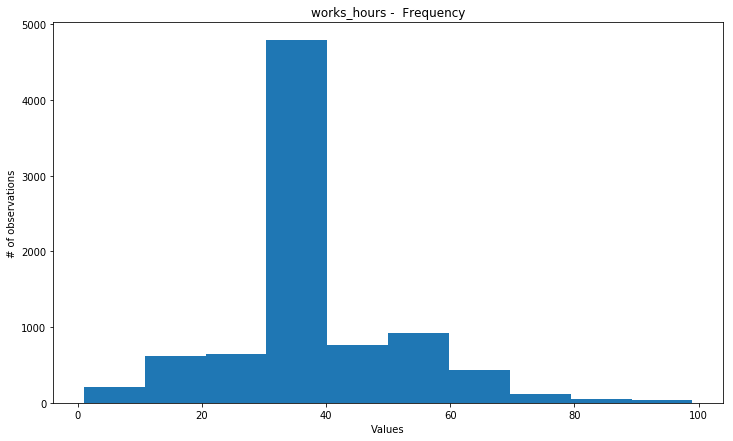

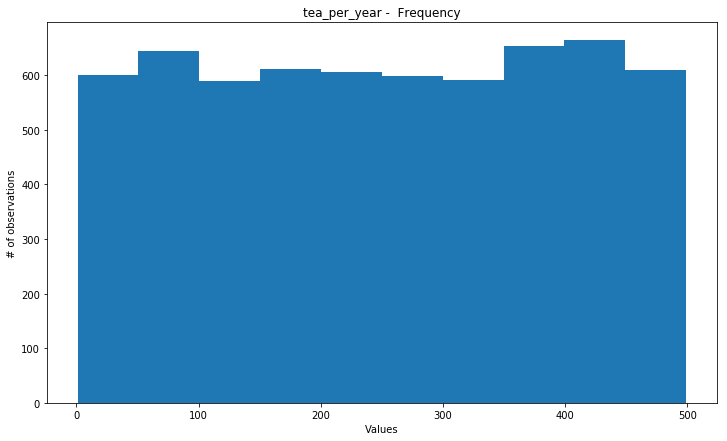

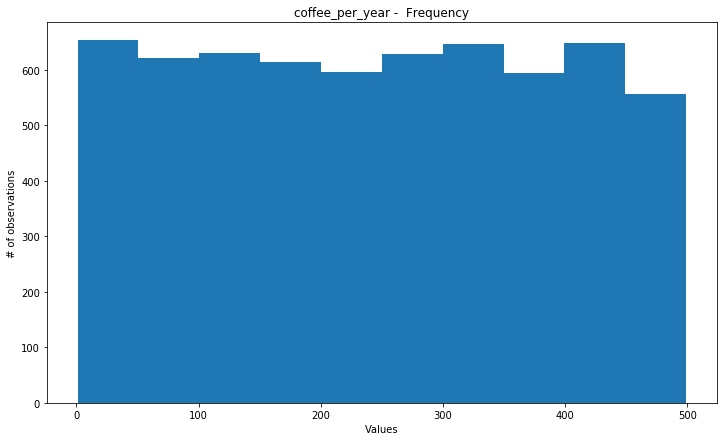

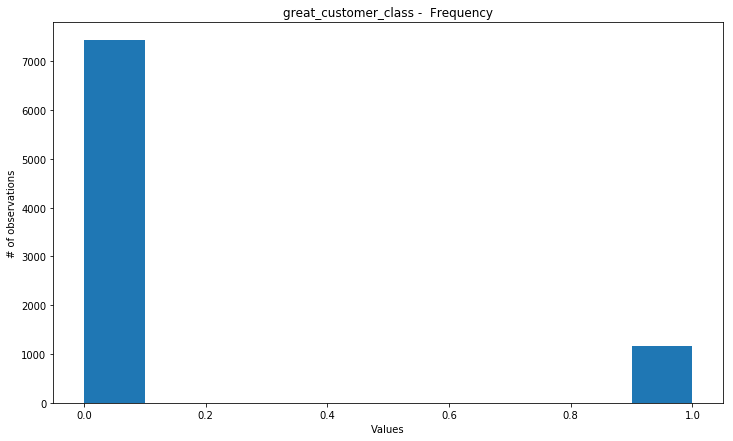

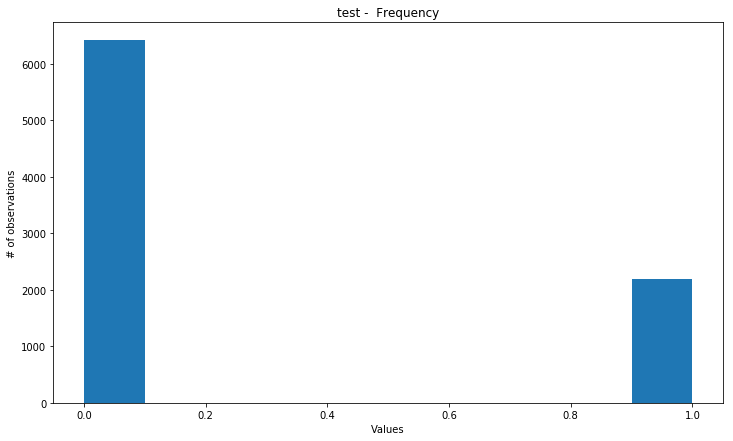

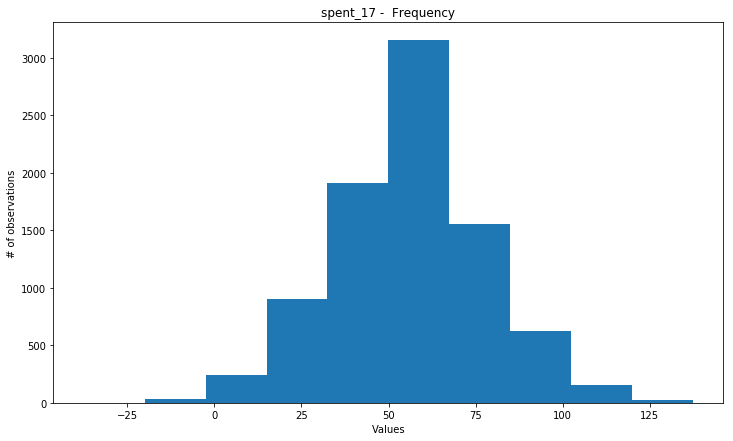

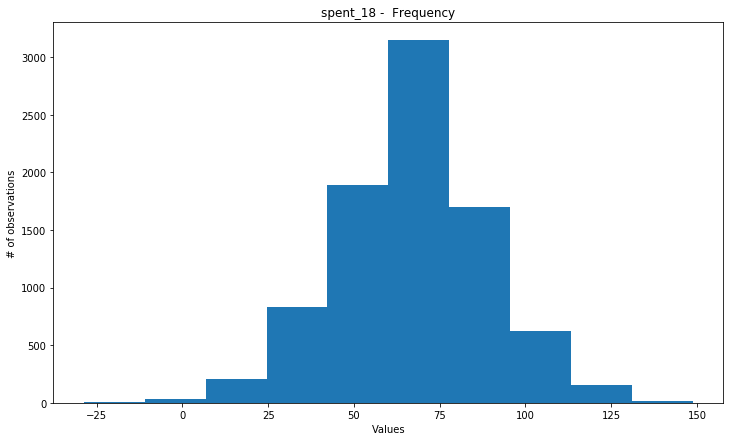

In [30]:
# Data Distributions Visualisation
category_columns = []
for column in data:
    if data.dtypes[column] == 'object':
        category_columns.append(column)
        
for column in data:
    if column in category_columns:
        plt.figure(figsize = (12,7))
        plt.title('{} - Categories and Frequency'.format(column))
        plt.xlabel('Categories')
        plt.ylabel('# of observations')
        value_counts = data[column].value_counts()
        plt.bar(value_counts.index, value_counts)
        
    else:
        plt.figure(figsize = (12,7))
        plt.title('{} -  Frequency'.format(column))
        plt.xlabel('Values')
        plt.ylabel('# of observations')
        plt.hist(data[column])

correlation coefficient of spend and change_of_spend is [[ 1.         -0.31636065]
 [-0.31636065  1.        ]]


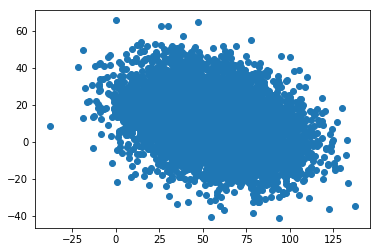

In [31]:


# Can change of spend be negatively correlated with spent_17 ?
#(beyond a saturation point, one will not spend more even with marketing?)

plt.scatter(data['spent_17'], data['change_of_spend'])

print('correlation coefficient of spend and change_of_spend is {}'.format(data[['spent_17','change_of_spend']].corr().values))

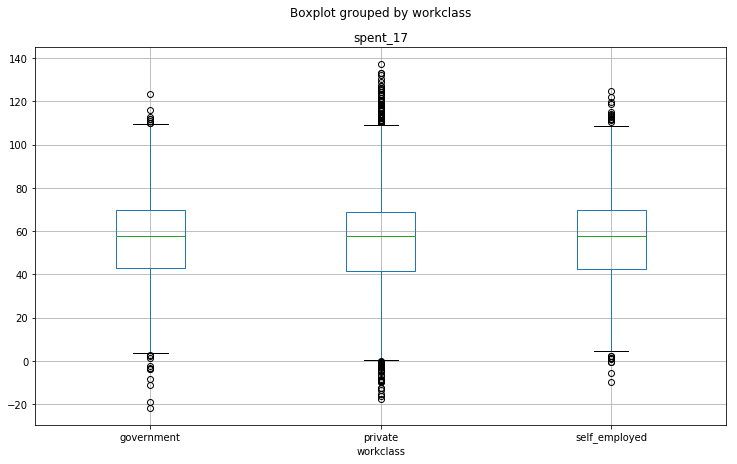

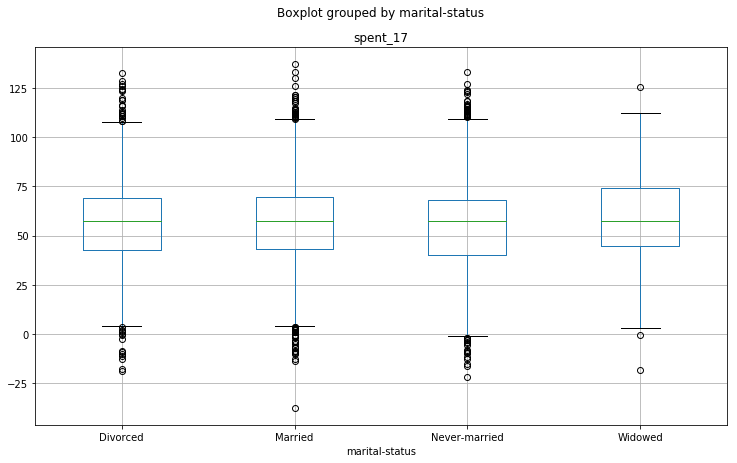

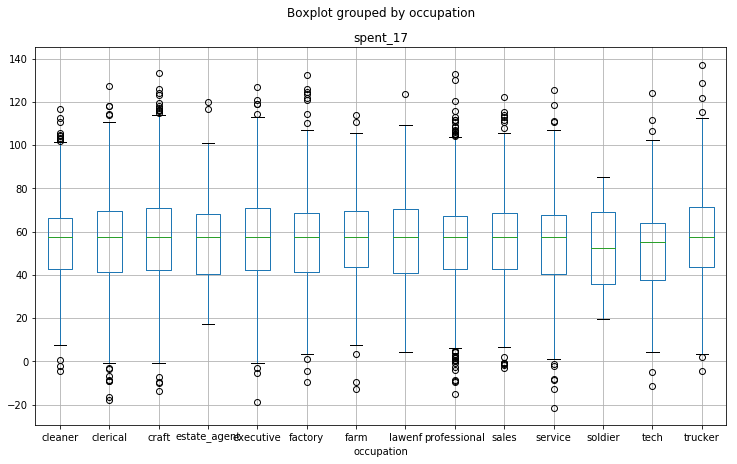

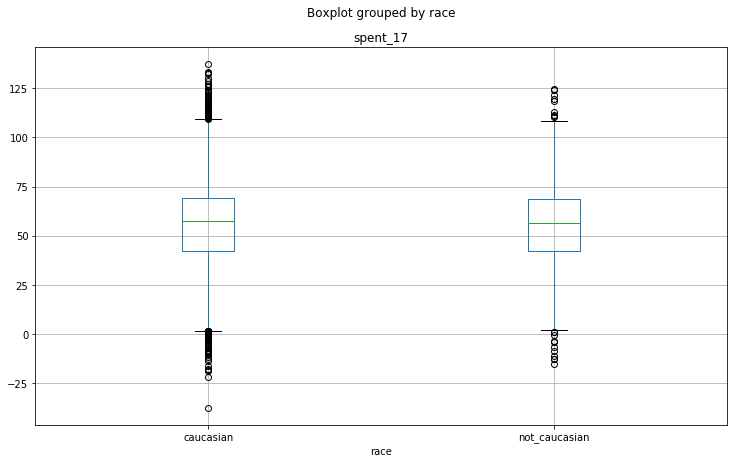

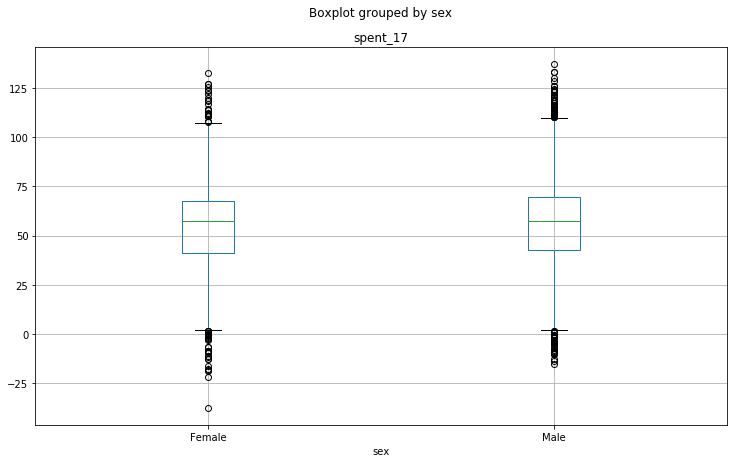

In [32]:
# How do spend differ when looking at different user attributes
for column in category_columns:
    data.boxplot(column = 'spent_17', by = column, figsize = (12,7))

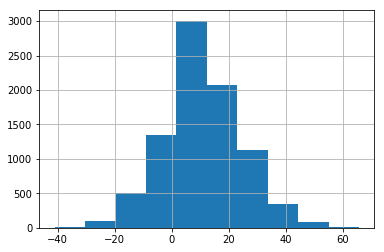

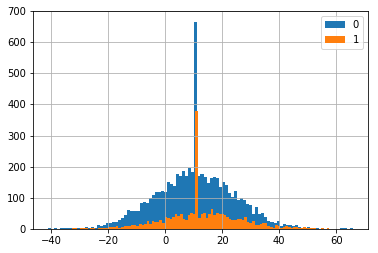

In [35]:


# overall change regardless of test
data['change_of_spend'].hist()
# group by test
plt.figure()
for test_groups , frames in data.groupby('test'):
    frames['change_of_spend'].hist(bins = 100)
    
plt.legend(data['test'].value_counts().index)    

In [4]:
### are identifiers unique?
data.index.dtype

dtype('int64')

# Part A: Programming and Machine Learning

In [ ]:
'''
Use Python (preferably 3) please, that is what the team works in and we can’t accept submissions
 written in other languages.
 
 There is some existing code (only a couple classes) that we would like you to use. Use the abstract
classes provided for your models and data loader.


Write a unit test for something. We don’t really mind what, even if you just write a test for the
###checking the file exists or loading it, we’ll be happy.

Predict the binary class ‘great_customer_class’ using two prediction models. Use a random forest,
then afterwards a second approach of your choice. This could be something to show your knowledge
about problem datasets like support vector machines, or could be something fancy like NN.

Determine ways to evaluate your prediction model.
Outline any concerns with the data and how you approached them.

Explain the dominant features for classifiers if it’s possible.
'''

In [6]:
from util.DataLoaders import AbstractDataLoader, FileDataLoader

loader = FileDataLoader(file_path)
loader

In [5]:
data.head()

AttributeError: 'FileDataLoader' object has no attribute 'head'

# Part B: Statistics and Causal Inference

##  Q1: Does Personalised Marketing Change the Spend?

### Is the mean of change of spend of the test group different from 0?

In [37]:
# One sample (2-sided) t-test of change of spend of test_group
p_value_t = one_sample_t_test(test_group_data['change_of_spend'])

print('mean of change_of_spend of test group is {}'.format(test_group_data['change_of_spend'].mean()))

p_value_t_2_side = 2 * p_value_t

print('p-value of tesing the mean = 0 is {}'.format(p_value_t_2_side))

mean of change_of_spend of test group is 12.71488596331236
p-value of tesing the mean = 0 is 2.56857151550325e-309


In [38]:
# What about control group?
p_value_t = one_sample_t_test(control_group_data['change_of_spend'])

print('mean of change_of_spend of control group is {}'.format(control_group_data['change_of_spend'].mean()))

p_value_t_2_side = 2 * p_value_t

print('p-value of tesing the mean = 0 is {}'.format(p_value_t_2_side))

mean of change_of_spend of control group is 10.506027042097786
p-value of tesing the mean = 0 is 0.0


In [ ]:
# Both groups have positive mean on the change of spend, 
# hence at this point it is inconclusive whether the marketing campaign would have increase the spend

### Is the distribution of change of spend of the test group different from that of the control group?

In [40]:
# Compare the mean of two groups, however check the variance first

p_value_compare_variance = two_sample_variance_test(control_group_data['change_of_spend'],test_group_data['change_of_spend'])

equal_variance = p_value_compare_variance > 0.05
print('Two groups have equal variance ? {}'.format(equal_variance))

p_value_compare_mean = two_sample_t_test(control_group_data['change_of_spend'],test_group_data['change_of_spend'], equal_var = equal_variance)

print('p-value of tesint equal mean of two groups is {}'.format(p_value_compare_mean))

Two groups have equal variance ? False
p-value of tesint equal mean of two groups is 3.035949438575935e-11


## Q2:  Experiment Set up

c:\users\ying-fang.kao\appdata\local\conda\conda\envs\myenv\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


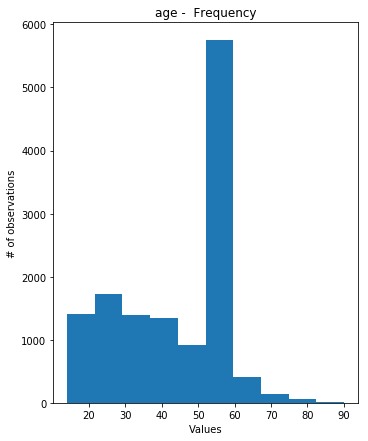

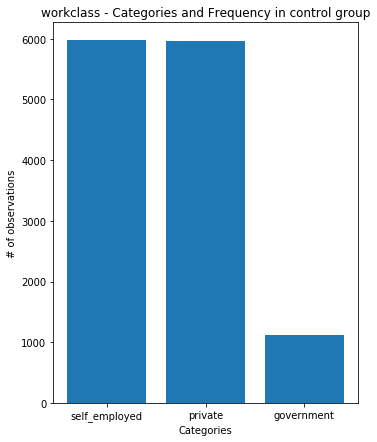

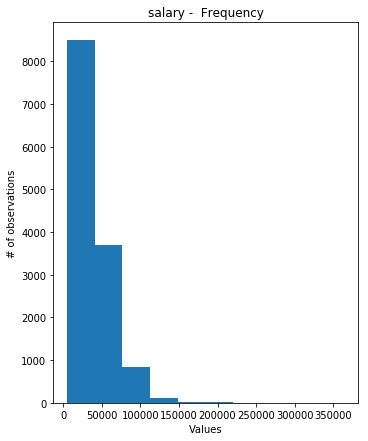

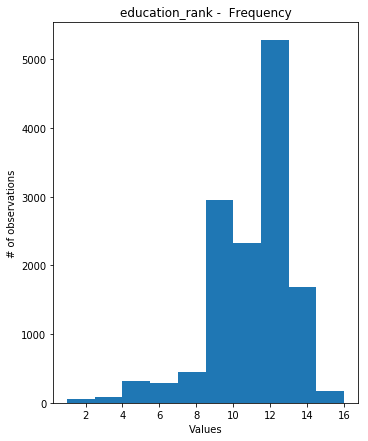

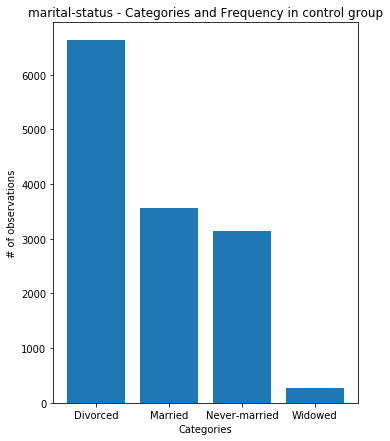

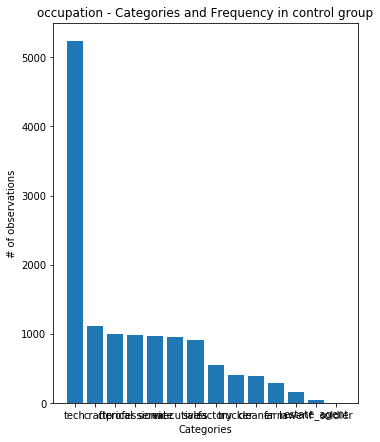

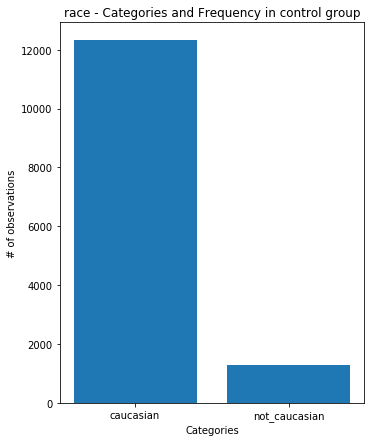

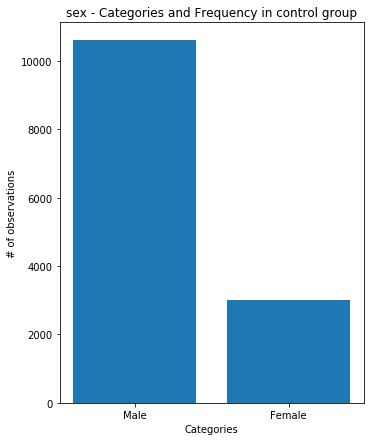

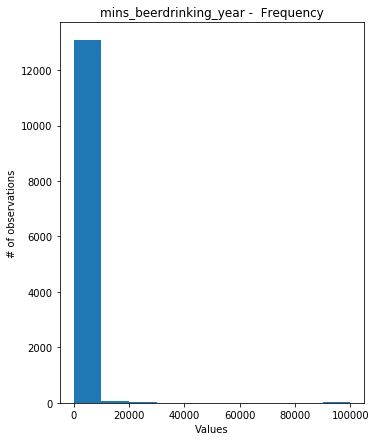

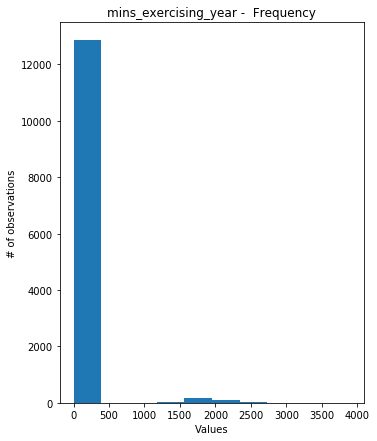

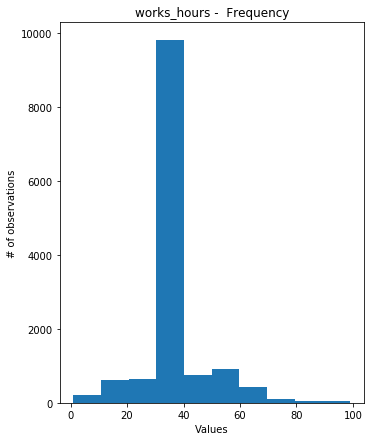

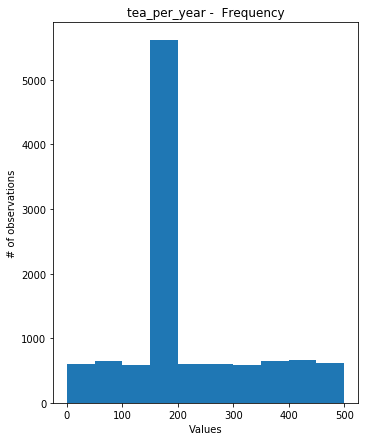

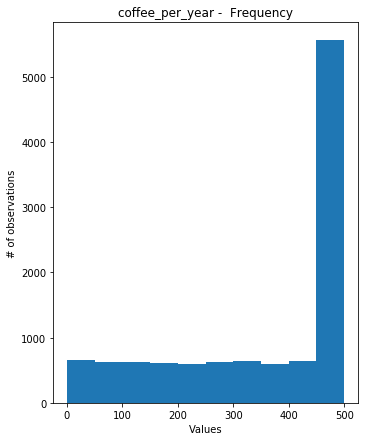

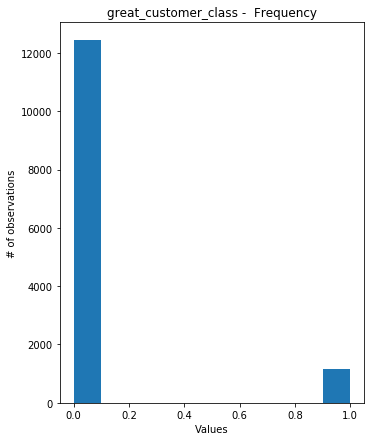

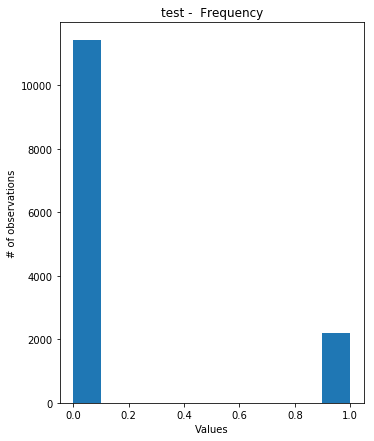

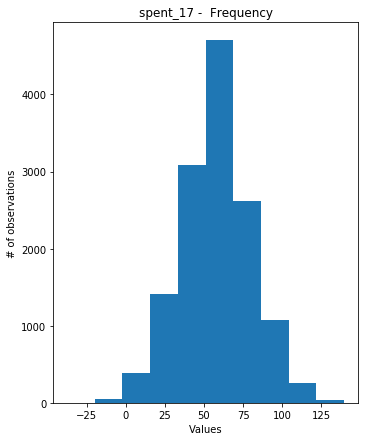

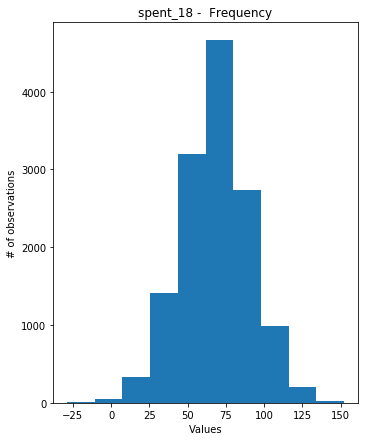

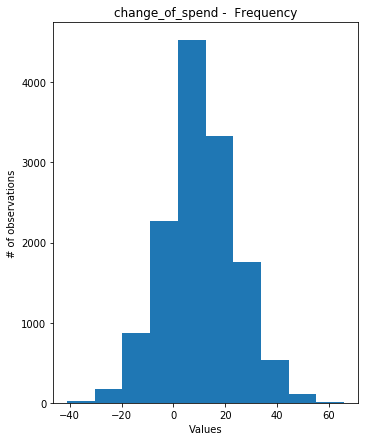

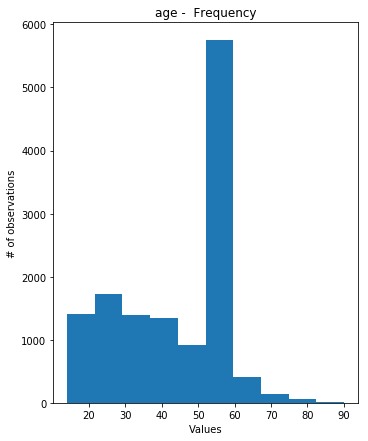

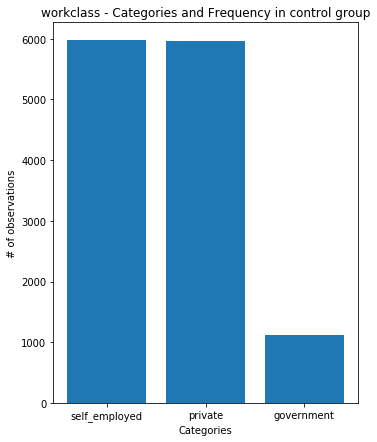

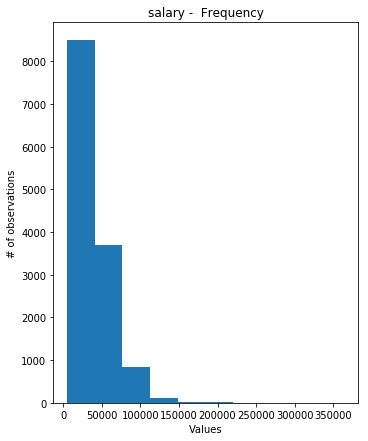

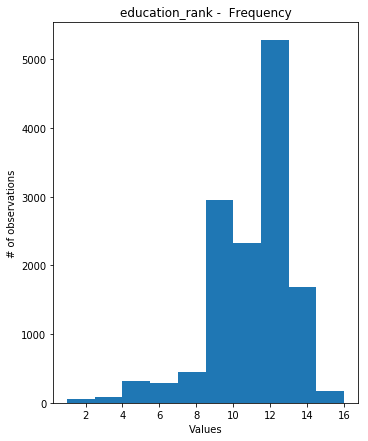

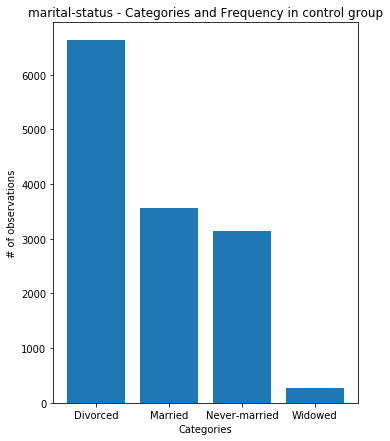

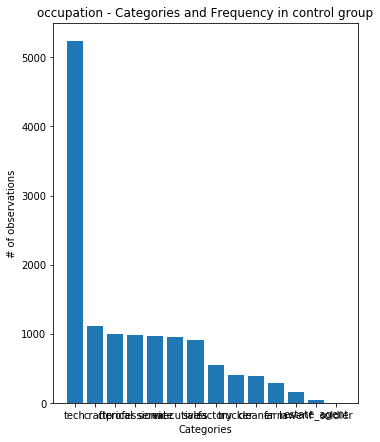

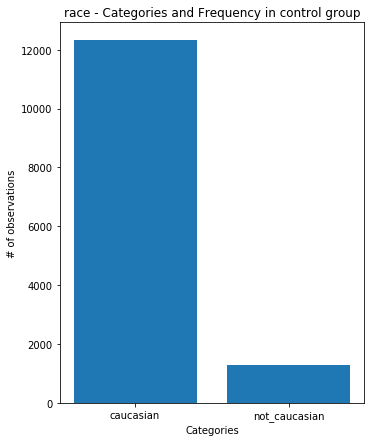

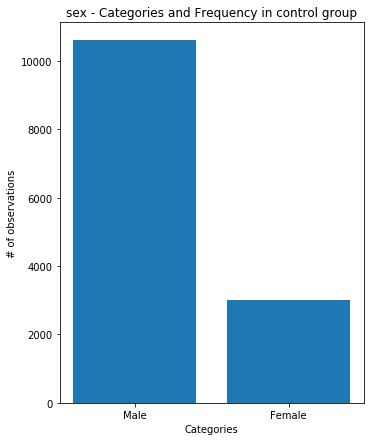

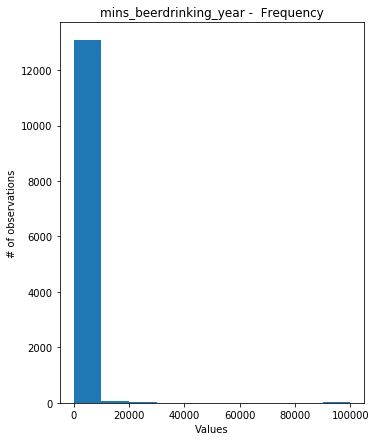

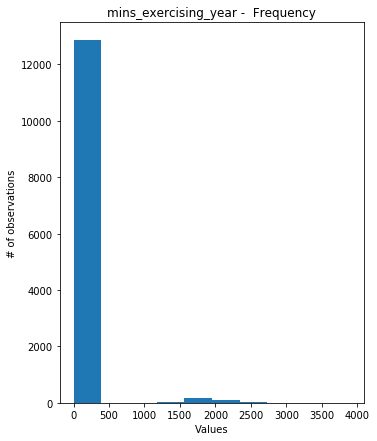

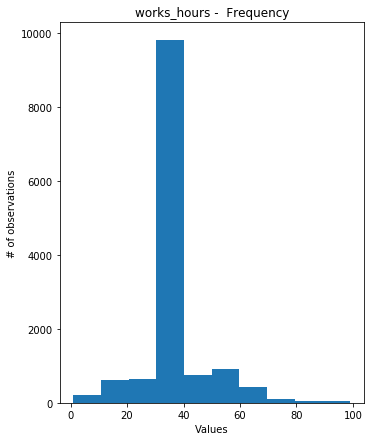

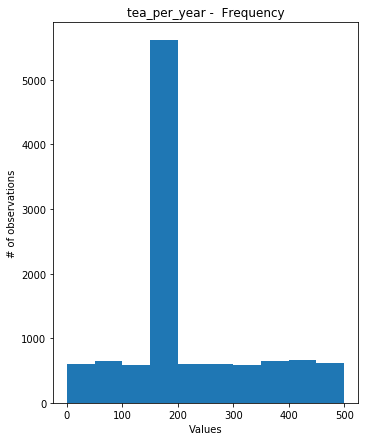

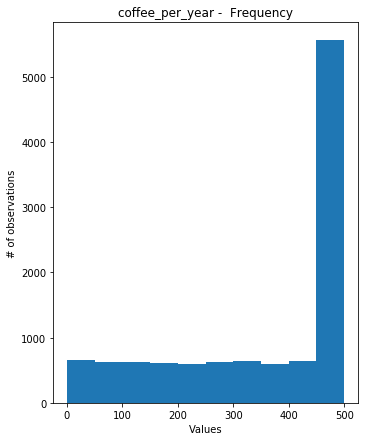

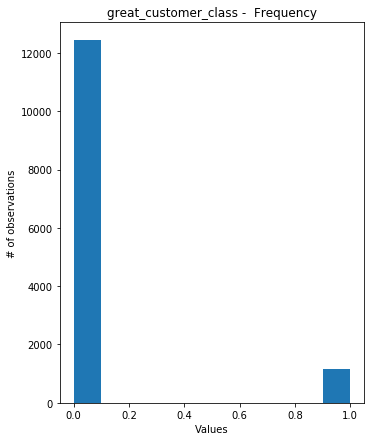

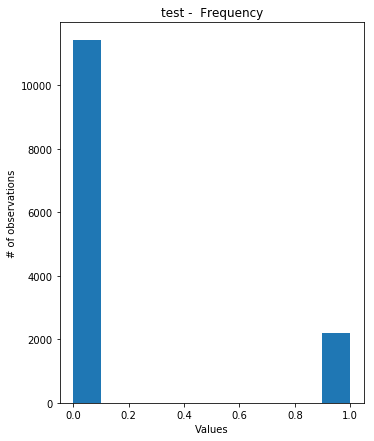

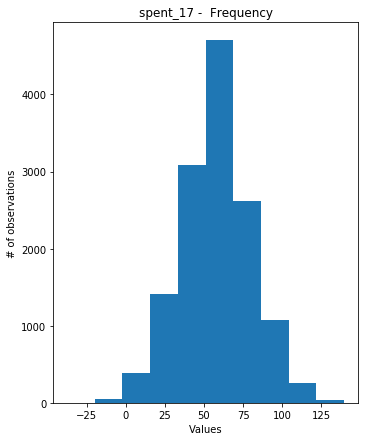

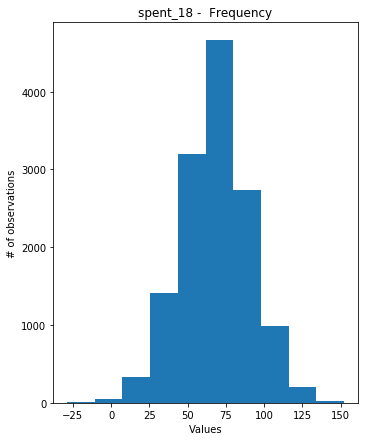

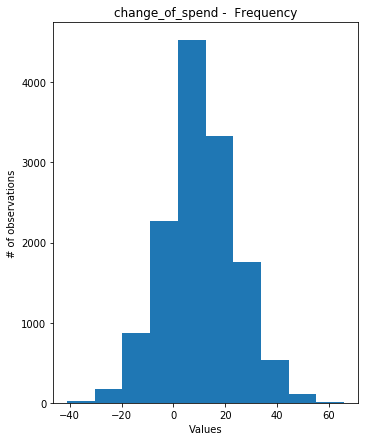

In [46]:
## compare the population in terms of different attributes
for test_groups , frames in data.groupby('test'):
    i = 1
    for column in frames:
        if frames.dtypes[column] == 'object':
            plt.figure(figsize = (12,7))
            plt.subplot(1,2, i)
            plt.title('{} - Categories and Frequency in control group'.format(column))
            plt.xlabel('Categories')
            plt.ylabel('# of observations')
            value_counts = data[column].value_counts()
            plt.bar(value_counts.index, value_counts)

        else:
            plt.figure(figsize = (12,7))
            plt.subplot(1,2,i)
            plt.title('{} -  Frequency'.format(column))
            plt.xlabel('Values')
            plt.ylabel('# of observations')
            plt.hist(data[column])

    i = i + 1

## Q3: Can you think of (a) different way(s) to leverage any suitable pre-experiment data for this test? If so, how are the results affected?


## Q4: Our personalisation experts suggested there might be subgroups among the customers for which the experiment worked better than for the rest. What kind of statistical analysis / causal modelling would you do to investigate this possibility?


## Q5: Did the campaign affect how many users reported a great customer experience?


## Q6: You learn that only about a third of all personalised messages were actually sent, but we don’t know which users received them. All sent messages were read, though. Does this change what you think about the impact of the personalised messages on spending?